In [ ]:
from google.colab import drive, userdata
import os

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Setup Variables
TOKEN = userdata.get('GITHUB_TOKEN')
USERNAME = "sandaruwijewardhana"
REPO_OWNER = "cepdnaclk"
REPO_NAME = "e20-4yp-Explainable-AI-Driven-Zero-Trust-Anomaly-Detection-for-Encrypted-Traffic"
EMAIL = "e20449@eng.pdn.ac.lk"

# 3. Navigate to your Repo
REPO_PATH = f"/content/drive/MyDrive/{REPO_NAME}"
%cd {REPO_PATH}

# 4. Configure Git and Update Remote
!git config --global user.email "{EMAIL}"
!git config --global user.name "{USERNAME}"
!git remote set-url origin https://{TOKEN}@github.com/{REPO_OWNER}/{REPO_NAME}.git

# 5. Push Changes
!git add .
!git commit -m "Updated research code from Colab"
!git push origin main

MessageError: Error: credential propagation was unsuccessful

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Load the dataset (replace with the correct path if needed)
csv_file_path = '/content/drive/MyDrive/GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
print(os.path.exists(csv_file_path))  # Should print True if the file exists

dataset = pd.read_csv(csv_file_path, encoding='utf-8')  # Replace with your actual file path


# Check for missing values in the entire dataset
missing_values = dataset.isnull().sum()

# Display columns with missing values and the number of missing values in each column
print("Missing values per column:")
print(missing_values[missing_values > 0])

# To get the rows with missing values
rows_with_missing_values = dataset[dataset.isnull().any(axis=1)]

# Display the number of missing values per row
rows_with_missing_count = rows_with_missing_values.isnull().sum(axis=1)

# Print the rows with missing values and how many missing in each row
print("\nRows with missing values and count of missing values:")
print(rows_with_missing_count)

# Optionally, display rows with missing values for further inspection
print("\nRows with missing values:")
print(rows_with_missing_values)


True
Missing values per column:
Flow Bytes/s    4
dtype: int64

Rows with missing values and count of missing values:
6796      1
14739     1
15047     1
209728    1
dtype: int64

Rows with missing values:
                                          Flow ID      Source IP  \
6796       192.168.10.16-198.54.12.145-36812-80-6  198.54.12.145   
14739   192.168.10.25-192.168.10.50-53581-37575-6  192.168.10.50   
15047          192.168.10.17-1.1.70.73-48283-80-6  192.168.10.17   
209728  192.168.10.17-192.168.10.50-39026-18467-6  192.168.10.17   

         Source Port  Destination IP   Destination Port   Protocol  \
6796              80   192.168.10.16              36812          6   
14739          37575   192.168.10.25              53581          6   
15047          48283       1.1.70.73                 80          6   
209728         39026   192.168.10.50              18467          6   

            Timestamp   Flow Duration   Total Fwd Packets  \
6796    7/7/2017 3:35               0    

In [ ]:
import pandas as pd
import os

# Define the directory containing CSV files
csv_directory = '/content/drive/MyDrive/GeneratedLabelledFlows/TrafficLabelling'

# Loop through each file in the directory
for filename in os.listdir(csv_directory):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        csv_file_path = os.path.join(csv_directory, filename)

        # Check if the file exists
        if os.path.exists(csv_file_path):
            print(f"\nAnalyzing file: {filename}")

            try:
                # Load the dataset with a fallback encoding
                dataset = pd.read_csv(csv_file_path, encoding='ISO-8859-1')  # Use 'ISO-8859-1' or 'utf-8' as needed

                # Check for missing values in the entire dataset
                missing_values = dataset.isnull().sum()

                # Count total rows and rows with missing values
                total_rows = len(dataset)
                rows_with_missing_values = dataset[dataset.isnull().any(axis=1)]
                rows_with_missing_count = len(rows_with_missing_values)

                # Display file name, total rows, and number of rows with missing values
                print(f"Total number of rows: {total_rows}")
                print(f"Rows with missing values: {rows_with_missing_count}")

            except Exception as e:
                print(f"Error reading file {filename}: {e}")

        else:
            print(f"File not found: {csv_file_path}")



Analyzing file: Wednesday-workingHours.pcap_ISCX.csv
Total number of rows: 692703
Rows with missing values: 1008

Analyzing file: Tuesday-WorkingHours.pcap_ISCX.csv
Total number of rows: 445909
Rows with missing values: 201

Analyzing file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Total number of rows: 288602
Rows with missing values: 18

Analyzing file: Monday-WorkingHours.pcap_ISCX.csv
Total number of rows: 529918
Rows with missing values: 64

Analyzing file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Total number of rows: 191033
Rows with missing values: 28

Analyzing file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Total number of rows: 225745
Rows with missing values: 4

Analyzing file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Total number of rows: 286467
Rows with missing values: 15

Analyzing file: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Total number of rows: 170366
Rows with missing values: 20


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Setup Path
input_path = '/content/drive/MyDrive/GeneratedLabelledFlows/TrafficLabelling'
output_file = '/content/drive/MyDrive/CLEANED_Combined_Traffic.csv'

# Get all CSV files
all_files = glob.glob(os.path.join(input_path, "*.csv"))

def clean_network_data(file_path):
    print(f"Processing: {os.path.basename(file_path)}")

    # Load data
    df = pd.read_csv(file_path)

    # Filtration 1: Strip Column Names
    df.columns = df.columns.str.strip()

    # Filtration 2: Handle Inf and NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Filtration 3: Normalize Labels
    # We strip the label text first just in case
    df['Label'] = df['Label'].str.strip()
    df['Label'] = df['Label'].apply(lambda x: 'Normal' if x == 'BENIGN' else 'Attack')

    # Filtration 4: Remove Duplicates
    df.drop_duplicates(inplace=True)

    # Filtration 5: Drop Identity Columns (Overfitting Prevention)
    # These columns are specific to a single capture and don't help generalize
    cols_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'External IP']
    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')

    return df

# Process and Combine
cleaned_dfs = []
for f in all_files:
    try:
        cleaned_df = clean_network_data(f)
        cleaned_dfs.append(cleaned_df)
    except Exception as e:
        print(f"Error processing {f}: {e}")

# Concatenate all files into one master dataset
final_df = pd.concat(cleaned_dfs, axis=0, ignore_index=True)

# Filtration 6: Remove Constant Features (Columns with 0 variance)
# This is done after combining to ensure we don't drop something that varies in other files
constant_cols = [col for col in final_df.columns if final_df[col].nunique() <= 1 and col != 'Label']
final_df.drop(columns=constant_cols, inplace=True)

# 3. Save the perfect dataset
final_df.to_csv(output_file, index=False)
print(f"\n✅ SUCCESS! Perfect dataset saved to: {output_file}")
print(f"Total Rows: {len(final_df)}")
print(f"Total Features: {len(final_df.columns) - 1}")
print("Label Distribution:\n", final_df['Label'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing: Wednesday-workingHours.pcap_ISCX.csv
Processing: Tuesday-WorkingHours.pcap_ISCX.csv
Processing: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Processing: Monday-WorkingHours.pcap_ISCX.csv
Processing: Friday-WorkingHours-Morning.pcap_ISCX.csv
Processing: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Processing: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Processing: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Error processing /content/drive/MyDrive/GeneratedLabelledFlows/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: 'utf-8' codec can't decode byte 0x96 in position 22398: invalid start byte

✅ SUCCESS! Perfect dataset saved to: /content/drive/MyDrive/CLEANED_Combined_Traffic.csv
Total Rows: 2657447
Total Features: 72
Label Distribution:
 Label
Normal    2103072
Attack     554375
Name: c

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

# 1. Mount Drive (if not already done)
drive.mount('/content/drive')

# 2. Paths
input_file = '/content/drive/MyDrive/CLEANED_Combined_Traffic.csv'
output_file = '/content/drive/MyDrive/ENCRYPTED_BEHAVIORAL_Traffic.csv'

# 3. Load the cleaned dataset
print("Loading dataset...")
df = pd.read_csv(input_file)

# 4. Strip column names just in case
df.columns = df.columns.str.strip()

# 5. Define "Encryption-Blind" Features
# These are features that are either hidden inside the tunnel or
# shouldn't be used in a pure behavioral model to prevent 'cheating'
blind_features = [
    'Flow ID',
    'Source IP',
    'Source Port',
    'Destination IP',
    'Destination Port',
    'Protocol',
    'Timestamp',
    'External IP',
    'Unnamed: 0' # Often appears as an index during csv saving
]

# 6. Remove the features
print(f"Original feature count: {len(df.columns)}")
df = df.drop(columns=[col for col in blind_features if col in df.columns], errors='ignore')

# 7. Final check: Remove any constant features that might have appeared after combining
# Features where every single row has the same value provide no info for the AI
constant_cols = [col for col in df.columns if df[col].nunique() <= 1 and col != 'Label']
if constant_cols:
    print(f"Removing constant features: {constant_cols}")
    df.drop(columns=constant_cols, inplace=True)

# 8. Save the behavioral-only dataset
df.to_csv(output_file, index=False)

print("\n" + "="*40)
print("✅ PROCESS COMPLETE")
print(f"Final feature count: {len(df.columns) - 1} (Behavioral only)")
print(f"Target Labels: {df['Label'].unique()}")
print(f"File saved to: {output_file}")
print("="*40)

# 9. Quick look at the top behavioral features left
print("\nSample of remaining behavioral features:")
print(list(df.columns[:10]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Original feature count: 73

✅ PROCESS COMPLETE
Final feature count: 69 (Behavioral only)
Target Labels: ['Normal' 'Attack']
File saved to: /content/drive/MyDrive/ENCRYPTED_BEHAVIORAL_Traffic.csv

Sample of remaining behavioral features:
['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the behavioral dataset
input_path = '/content/drive/MyDrive/ENCRYPTED_BEHAVIORAL_Traffic.csv'
df = pd.read_csv(input_path)

# 2. Split the data (80% for Training, 20% for Testing)
# We use 'stratify' to keep the Normal/Attack balance identical in both files
train_df, test_df = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df['Label']
)

# 3. Save as separate CSV files
train_path = '/content/drive/MyDrive/DATASET/TRAIN_Traffic.csv'
test_path = '/content/drive/MyDrive/DATASET/TEST_Traffic.csv'

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"✅ Data Split Complete!")
print(f"📁 Training Set: {len(train_df)} rows -> {train_path}")
print(f"📁 Testing Set: {len(test_df)} rows -> {test_path}")

✅ Data Split Complete!
📁 Training Set: 2125957 rows -> /content/drive/MyDrive/DATASET/TRAIN_Traffic.csv
📁 Testing Set: 531490 rows -> /content/drive/MyDrive/DATASET/TEST_Traffic.csv


🔍 Analyzing feature redundancy (Threshold > 0.95)...
✅ Redundancy Audit Complete.
Total Original Features: 69
Features Dropped: 23
Features Remaining for Training: 46

🌳 Training Decision Tree to rank all remaining features...

--- TOP 10 CORRELATED PAIRS (REDUNDANT) ---
         Dropped Feature   Correlated With (Survivor)  Correlation Coefficient
17   Fwd Header Length.1            Fwd Header Length                   1.0000
18   Subflow Fwd Packets            Total Fwd Packets                   1.0000
21     Subflow Fwd Bytes  Total Length of Fwd Packets                   1.0000
16  Avg Bwd Segment Size       Bwd Packet Length Mean                   1.0000
14  Avg Fwd Segment Size       Fwd Packet Length Mean                   1.0000
11        CWE Flag Count                Fwd URG Flags                   1.0000
10        SYN Flag Count                Fwd PSH Flags                   1.0000
28     Subflow Bwd Bytes  Total Length of Bwd Packets                   1.0000
23   Subflow Bwd 

/tmp/ipython-input-3119265806.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance_Score', y='Feature', data=full_ranking_df, palette='viridis')


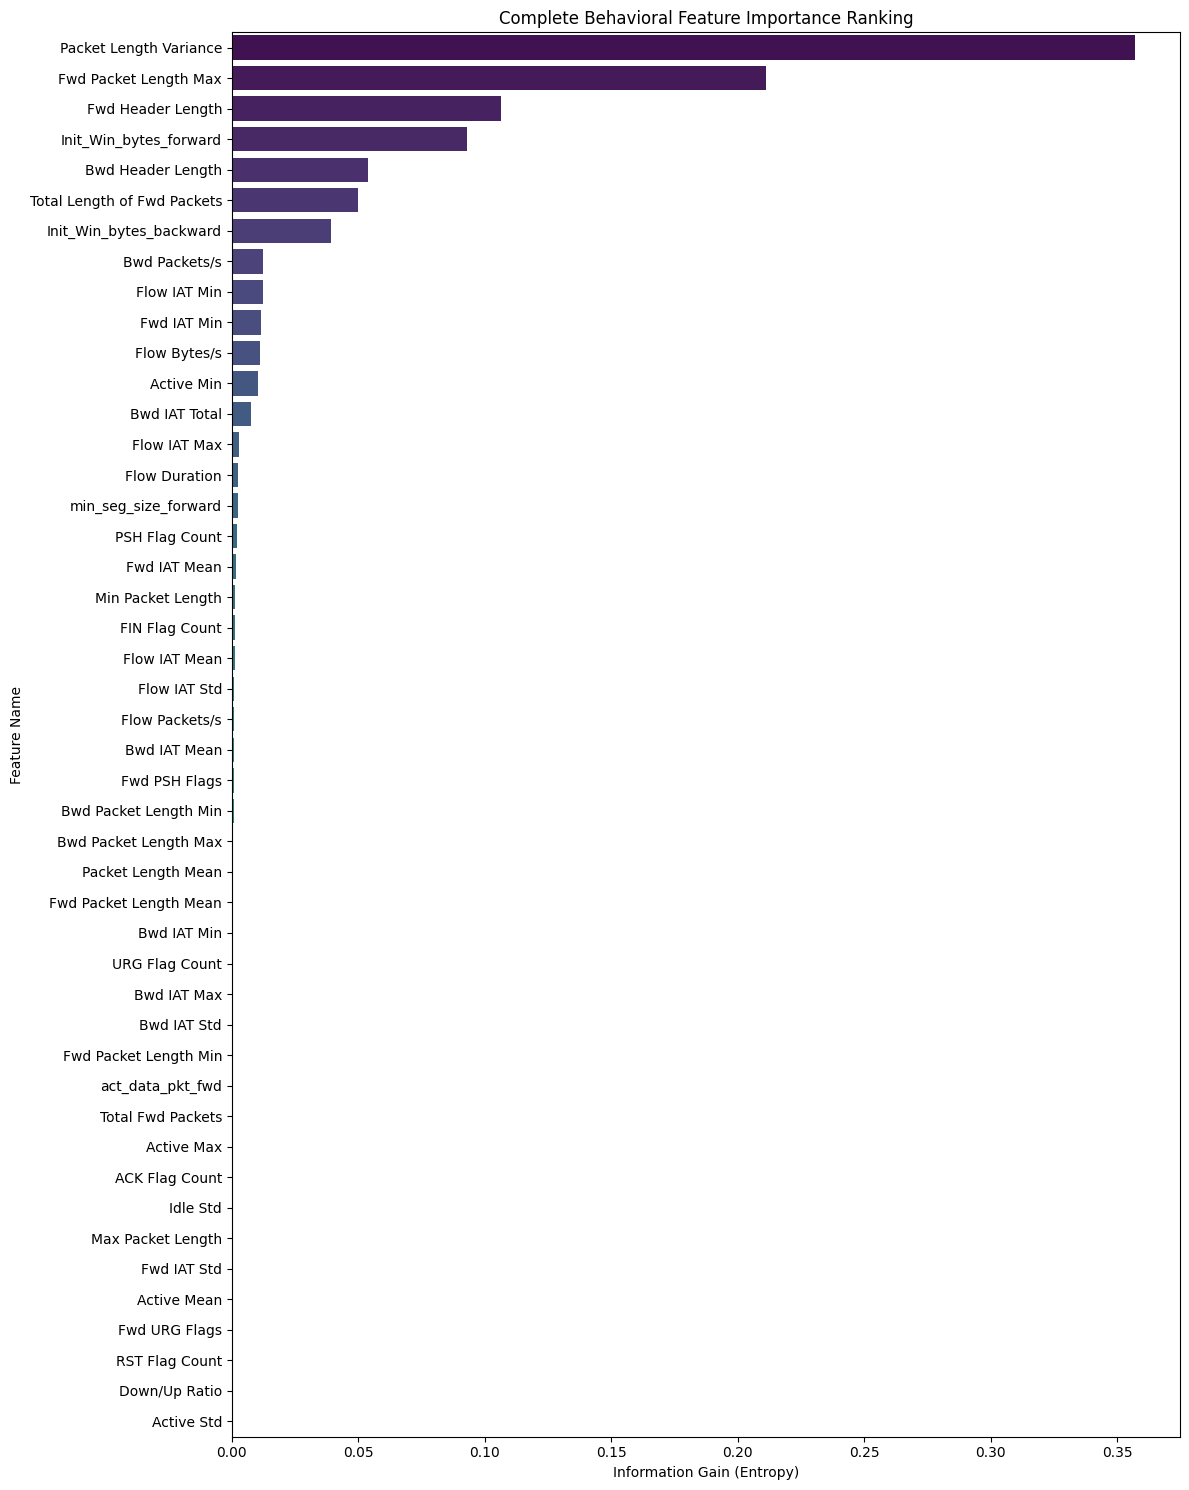

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# 1. Load your training data
# Ensure this path matches your current Colab environment
file_path = '/content/drive/MyDrive/DATASET/TRAIN_Traffic.csv'
df = pd.read_csv(file_path)
X = df.drop('Label', axis=1)
y = df['Label']

# --- PART A: DETAILED CORRELATION AUDIT ---
print("🔍 Analyzing feature redundancy (Threshold > 0.95)...")
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify redundant pairs and track them for your report
redundancy_log = []
to_drop = set()

for column in upper.columns:
    correlated_with = upper.index[upper[column] > 0.95].tolist()
    if correlated_with:
        to_drop.add(column)
        for parent in correlated_with:
            redundancy_log.append({
                'Dropped Feature': column,
                'Correlated With (Survivor)': parent,
                'Correlation Coefficient': round(upper.loc[parent, column], 4)
            })

# Create a DataFrame of redundant features for your documentation
redundancy_df = pd.DataFrame(redundancy_log)
X_reduced = X.drop(columns=list(to_drop))

print(f"✅ Redundancy Audit Complete.")
print(f"Total Original Features: {len(X.columns)}")
print(f"Features Dropped: {len(to_drop)}")
print(f"Features Remaining for Training: {len(X_reduced.columns)}")

# --- PART B: FULL RANKING BY TREE IMPORTANCE ---
print("\n🌳 Training Decision Tree to rank all remaining features...")
# Using a 20% sample for efficient ranking in Colab
sample_size = int(len(df) * 0.2)
X_sample = X_reduced.sample(n=sample_size, random_state=42)
y_sample = y.loc[X_sample.index]

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_sample, y_sample)

# Get importance scores for ALL surviving features
full_ranking_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance_Score': model.feature_importances_
}).sort_values(by='Importance_Score', ascending=False)

# --- PART C: OUTPUT AND EXPORT ---

# 1. Save the Redundancy Log (Useful for Methodology chapter)
redundancy_df.to_csv('/content/drive/MyDrive/e20-4yp-Explainable-AI-Driven-Zero-Trust-Anomaly-Detection-for-Encrypted-Traffic/BaseCheckClassifier/Feature_Redundancy_Log.csv', index=False)

# 2. Save the Full Feature Ranking (Useful for Results chapter)
full_ranking_df.to_csv('/content/drive/MyDrive/e20-4yp-Explainable-AI-Driven-Zero-Trust-Anomaly-Detection-for-Encrypted-Traffic/BaseCheckClassifier/Full_Feature_Ranking.csv', index=False)

# 3. Save the Top 15 specifically for the Sentry implementation
top_15 = full_ranking_df.head(15)['Feature'].tolist()
with open('/content/drive/MyDrive/e20-4yp-Explainable-AI-Driven-Zero-Trust-Anomaly-Detection-for-Encrypted-Traffic/BaseCheckClassifier/SENTRY_FEATURES.txt', 'w') as f:
    for feat in top_15:
        f.write(f"{feat}\n")

# Display the findings
print("\n--- TOP 10 CORRELATED PAIRS (REDUNDANT) ---")
print(redundancy_df.sort_values(by='Correlation Coefficient', ascending=False).head(10))

print("\n--- FULL FEATURE IMPORTANCE (TOP 20) ---")
print(full_ranking_df.head(20).to_string(index=False))

# Visualization of all surviving features
plt.figure(figsize=(12, 15))
sns.barplot(x='Importance_Score', y='Feature', data=full_ranking_df, palette='viridis')
plt.title('Complete Behavioral Feature Importance Ranking')
plt.xlabel('Information Gain (Entropy)')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Split Data
train_df = pd.read_csv('/content/drive/MyDrive/DATASET/TRAIN_Traffic.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DATASET/TEST_Traffic.csv')

# 2. Use your Top 15 Selected Features
selected_features = [
    'Packet Length Variance', 'Fwd Packet Length Max', 'Fwd Header Length',
    'Init_Win_bytes_forward', 'Bwd Header Length', 'Total Length of Fwd Packets',
    'Init_Win_bytes_backward', 'Bwd Packets/s', 'Flow IAT Min', 'Fwd IAT Min',
    'Flow Bytes/s', 'Active Min', 'Bwd IAT Total', 'Flow IAT Max', 'Flow Duration'
]

X_train = train_df[selected_features]
y_train = train_df['Label']
X_test = test_df[selected_features]
y_test = test_df['Label']

# 3. Train the Final Sentry Model
# Using 'balanced' weight is critical for ZTA to prioritize catching attacks
sentry_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=12,
    class_weight='balanced',
    random_state=42
)
sentry_model.fit(X_train, y_train)

# 4. Final Evaluation
y_pred = sentry_model.predict(X_test)

print("🛡️ FINAL SENTRY PERFORMANCE REPORT")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix (The 'Security Audit')
cm = confusion_matrix(y_test, y_pred, labels=['Normal', 'Attack'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Sentry Confusion Matrix')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DATASET/TRAIN_Traffic.csv'